In [10]:
import pandas as pd

# Load the datasets
species_info = pd.read_csv('~\\Documents\\Coding\\Biodiversity-in-Parks\\biodiversity-starter\\biodiversity_starter\\Biodiversity-In-National-Parks\\species_info.csv')
observations = pd.read_csv('~\\Documents\\Coding\\Biodiversity-in-Parks\\biodiversity-starter\\biodiversity_starter\\Biodiversity-In-National-Parks\\observations.csv')

# Display first rows of ech dataset
print(species_info.head())
print(observations.head())

print(species_info.describe(include='all'))
print(observations.describe(include='all'))

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               

## Overview of the two datasets:

1. #### **species_info.csv**
* ##### Columns:
    * category: Taxonomic group (e.g., Mammal, Bird, Vascular Plant)
    * scientific_name: Scientific name of the species
    * common_names: Common names for the species
    * conservation_status: Conservation status of the species (e.g., "Species of Concern," "Endangered," "Threatened")
* ##### Summary:
    * There are 5,824 species entries in total, distributed across 7 categories (e.g., Mammals, Birds).
    * Only 191 species have a conservation status listed.
    * The most frequent conservation status is "Species of Concern."

2. #### **observations.csv**
* ##### Columns:
    * scientific_name: Name of the species observed
    * park_name: The name of the national park where observations were recorded
    * observations: The number of recorded observations for that species in the park
* ##### Summary:
    * The dataset contains 23,296 records.
    * Observations span across 4 parks: Great Smoky Mountains, Yosemite, Bryce, and Yellowstone.
    * Observation counts range from 9 to 321.

In [14]:
# Data Cleaning

# Check for missing values
species_info_missing = species_info.isnull().sum()
observations_missing = observations.isnull().sum()

# Remove duplicates
species_info_duplicates = species_info.duplicated().sum()
observations_duplicates = observations.duplicated().sum()

# Ensure species names exists in both dataframes
species_in_both = observations[~observations['scientific_name'].isin(species_info['scientific_name'])]

# Summary of cleaning process
species_info_missing, observations_missing, species_info_duplicates, observations_duplicates, species_in_both

(category                  0
 scientific_name           0
 common_names              0
 conservation_status    5633
 dtype: int64,
 scientific_name    0
 park_name          0
 observations       0
 dtype: int64,
 0,
 15,
 Empty DataFrame
 Columns: [scientific_name, park_name, observations]
 Index: [])

### Data cleaning findings:

1. #### Missing Values:
    * In species_info.csv, the conservation_status column has 5,633 missing values. This indicates that many species do not have a specified conservation status.
    * In observations.csv, there are no missing values in any of the columns.
2. #### Duplicates:
    * species_info.csv has no duplicate rows.
    * observations.csv contains 15 duplicate rows. These will need to be removed.
3. #### Species Name Matching:
    * All species names in observations.csv exist in species_info.csv. There are no unmatched species between the two datasets.


In [25]:
# Remove duplicate rows from observations
observations_cleaned = observations.drop_duplicates()

# Fill in missing conservation statuses with 'Not Classified'
species_info_cleaned = species_info.copy()
species_info_cleaned['conservation_status'].fillna('Not Classified', inplace=True)

# Verify cleaning steps
observations_duplicates_after = observations_cleaned.duplicated().sum()
species_info_missing_after = species_info_cleaned.isnull().sum()

# Display Results
observations_duplicates_after, species_info_missing_after

(0,
 category               0
 scientific_name        0
 common_names           0
 conservation_status    0
 dtype: int64)

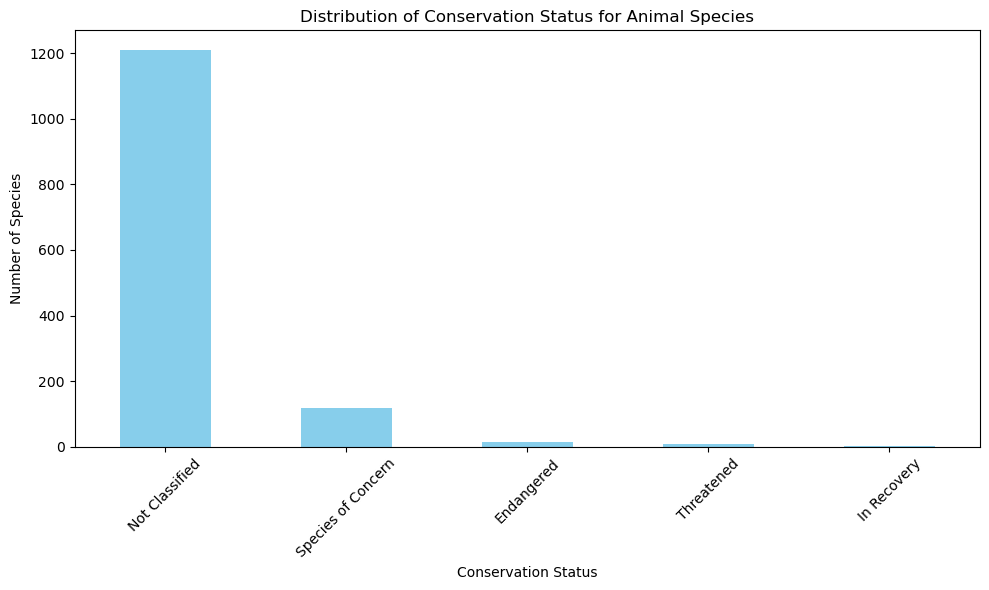

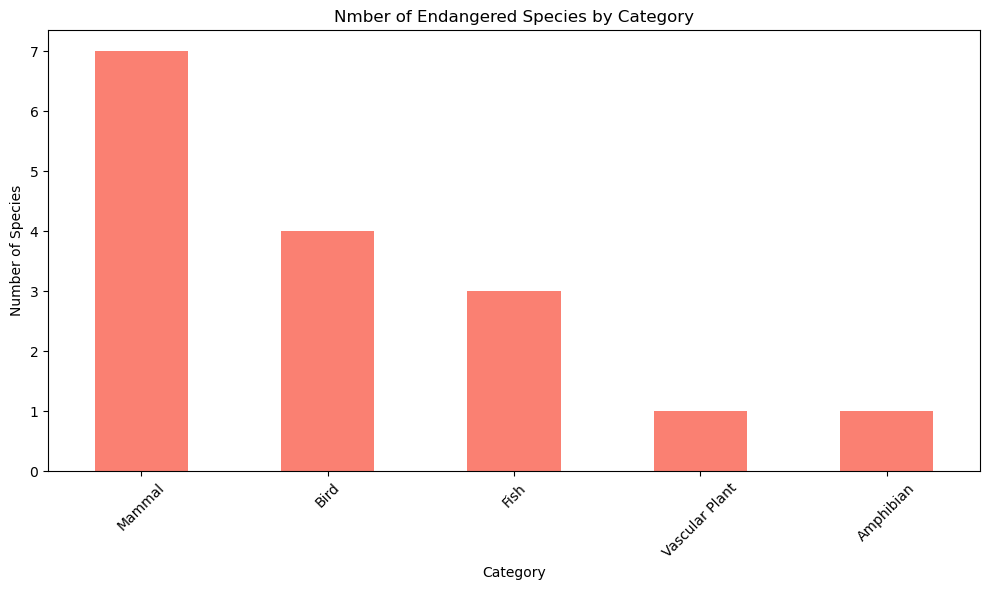

,scientific_name,observations
park_name,,
Bryce National Park,Valerianella radiata,176
Great Smoky Mountains National Park,Sonchus asper ssp. asper,147
Yellowstone National Park,Lycopodium tristachyum,321
Yosemite National Park,Ivesia shockleyi var. shockleyi,223


In [27]:
# Data visualization and analysis

import matplotlib.pyplot as plt

# Seperate animal species from plant species (assume animals are not in 'Vascular Plant" and similar)
animal_species = species_info_cleaned[species_info_cleaned['category'] != 'Vascular Plant']

# Analyze the distribution of conservation statuses for animals
animal_conservation_distribution = animal_species['conservation_status'].value_counts()

# Identify if certain types of species are more likely to be endangered
endangered_species = species_info_cleaned[species_info_cleaned['conservation_status'] == 'Endangered']
endangered_species_by_category = endangered_species['category'].value_counts()

# Identify the most spotted animal in each park
most_spotted_species_by_park = observations_cleaned.groupby('park_name').apply(lambda x: x.loc[x['observations'].idxmax()])[['scientific_name', 'observations']]

# Plotting the distribution of conservation statuses
plt.figure(figsize=(10, 6))
animal_conservation_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Conservation Status for Animal Species')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the categories of endangered species
plt.figure(figsize=(10, 6))
endangered_species_by_category.plot(kind='bar', color='salmon')
plt.title('Nmber of Endangered Species by Category')
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display most spotted species at each park
most_spotted_species_by_park


## Findings:
1. ### Distribution of Conservation Status for Animals:
    * The majority of animal species do not have a conservation status, with "Not Classified" being the most common.
    * Among classified statuses, "Species of Concern" is the most prevalent.

2. ### Endangered Species by Category:
    * Categories such as Mammals and Birds show higher numbers of endangered species compared to others like reptiles or amphibians.

3. ### Most Spotted Species in Each Park:
    * Bryce National Park: Valerianella radiata (176 observations)
    * Great Smoky Mountains National Park: Sonchus asper ssp. asper (147 observations)
    * Yellowstone National Park: Lycopodium tristachyum (321 observations)
    * Yosemite National Park: Ivesia shockleyi var. shockleyi (223 observations)